(1) Data Description:
Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.



Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

(2) Questions:
Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

(3) Exploratory Data Analysis and Visualization
In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

(4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
(5) GitHub Repository

Provide the link to your GitHub repository for the project. You must have at least five commits with a description of the work that has been done towards completion of the individual report in the commit history of this repository. 

In [2]:
# Code that lets me work with tidyverse and other related libraries
library(tidyverse)
library(repr)
library(tidymodels)


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


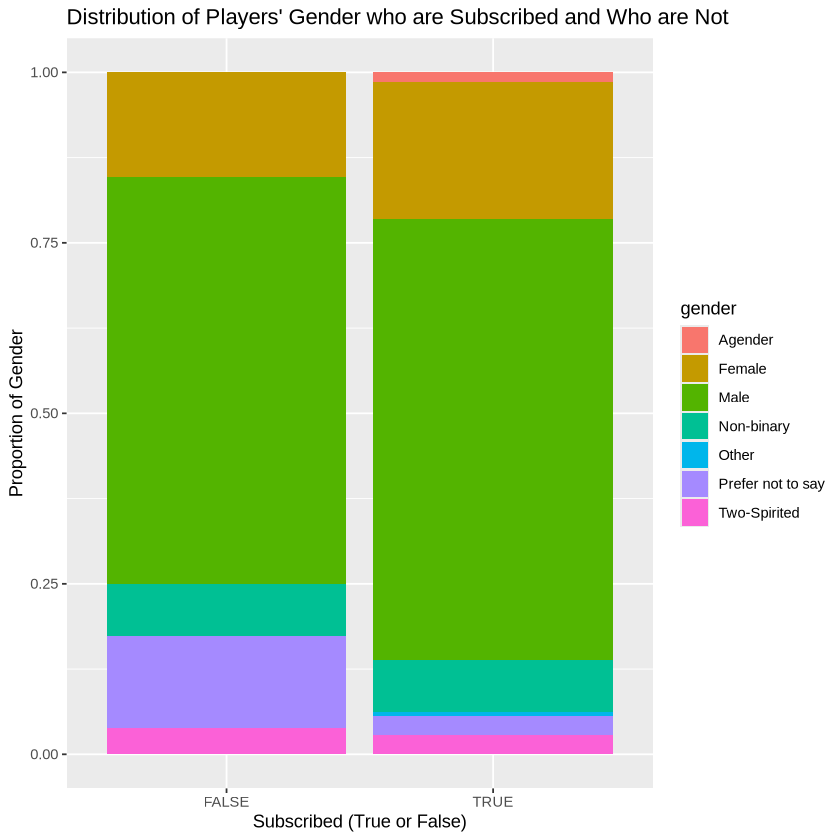

In [61]:
# Getting the datasets into tidy data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# summarizing the mean values of the quantitative variables in the players.csv data table
player_mean_values <- players |> summarize(avg_hours_played = mean(played_hours, na.rm = TRUE), avg_age = mean(Age, na.rm = TRUE))

# visualizing the distribution of hours played for all players
hours_played_viz <- players |> ggplot(aes(x = played_hours)) + geom_histogram() + labs(x = "Time Played (hours)", y = "Number of Players") + 
ggtitle("Distribution of Hours Played in a Minecraft Server") + theme(text = element_text(size = 20))

# visualizing the distribution of the age of all players
age_viz <- players |> ggplot(aes(x = Age)) + geom_histogram() + labs(x = "Age of Player", y = "Number of Players") + 
ggtitle("Distribution of Ages") + theme(text = element_text(size = 20))

# visualizting the distribution of Players' experience
exp_viz <- players |> ggplot(aes(x = experience)) + geom_bar() + labs(x = "Experience Level Described", y = "Number of Players") + 
ggtitle("Distribution of Experience Levels") + theme(text = element_text(size = 20))


# visualizing the proportion of Players who are subscribed and their gender
sub_viz <- players |> ggplot(aes(x = subscribe, fill = gender)) + geom_bar(position = "fill") + labs(x = "Subscribed (True or False)", y = "Proportion of Gender") + 
ggtitle("Distribution of Players' Gender who are Subscribed and Who are Not")
sub_viz




